<a href="https://colab.research.google.com/github/pachterlab/BLCSBGLKP_2020/blob/master/notebooks/memtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Mon May 11 04:39:50 UTC 2020


In [2]:
!git clone https://github.com/pachterlab/BLCSBGLKP_2020.git

Cloning into 'BLCSBGLKP_2020'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 149 (delta 34), reused 77 (delta 10), pack-reused 0
Receiving objects: 100% (149/149), 33.43 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (34/34), done.


# Memory and time

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

from collections import defaultdict
from collections import OrderedDict


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.patches as mpatches

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

cm = {1:"#D43F3A", 0:"#3182bd"}
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [0]:
df = pd.read_csv("BLCSBGLKP_2020/data/kb/memtime.txt", sep="\t")

In [0]:
df["wall_time_s"] = df["wall_time"].apply(lambda x: int(x.split(":")[0])*60 + float(x.split(":")[1]))

In [6]:
df

,n_reads,n_aligned,wall_time,max_mem_bytes,wall_time_s
0,77691320,25707395,1:46.40,1052256000,106.40
1,154370906,50499526,3:32.77,1052112000,212.77
2,231697649,76065442,5:15.13,1052184000,315.13
3,307494992,100608712,6:59.05,1052216000,419.05


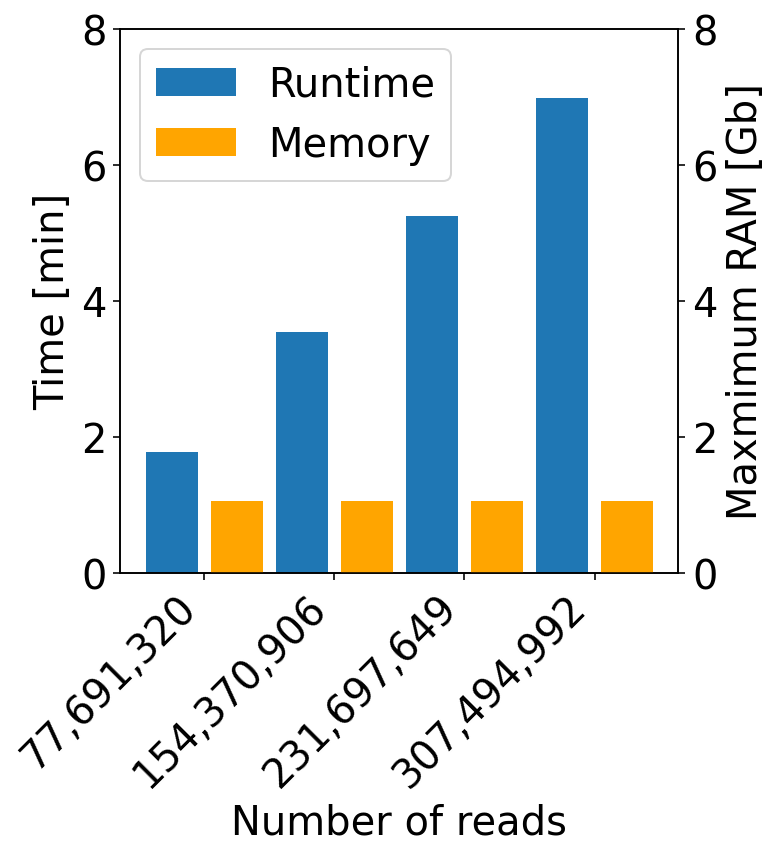

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

x = df["n_reads"].values.astype(int)
xind = np.arange(0, len(x)*2, 2)
y = df["wall_time_s"].values.astype(float)/60
yy = df["max_mem_bytes"]/1e9

rt = ax.bar(xind-0.5, y, width=0.8, label="Runtime")
# ax.bar(xind+0.5, yy, width=0.8)

ax2 = ax.twinx()
mem = ax2.bar(xind+0.5, yy, width=0.8, color="orange", label="Memory")
ax2.set_ylim(0, 8)
ax2.set_ylabel("Maxmimum RAM [Gb]")


ax.set_xticks(xind)
fmt = lambda x: "{:,.0f}".format(x)
ax.set_xticklabels([fmt(i) for i in x], ha="right", rotation=45)
ax.set_xlabel("Number of reads")
ax.set_ylabel("Time [min]")
ax.set_ylim(0, 8)


ax.legend(handles=[rt, mem])
#plt.savefig("./figs/memtime.png",bbox_inches='tight', dpi=300)

plt.show()